---
# Day 4

Import relevant raw data and parse "json-string" column "industries"

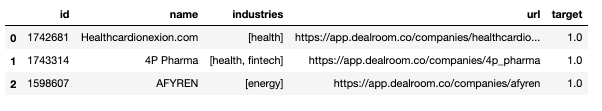


+ Importing **Dealroom news** from individual API queries (2' for 1513 companies) 
+ Scraping **Meta tag descriptions** (17' total)

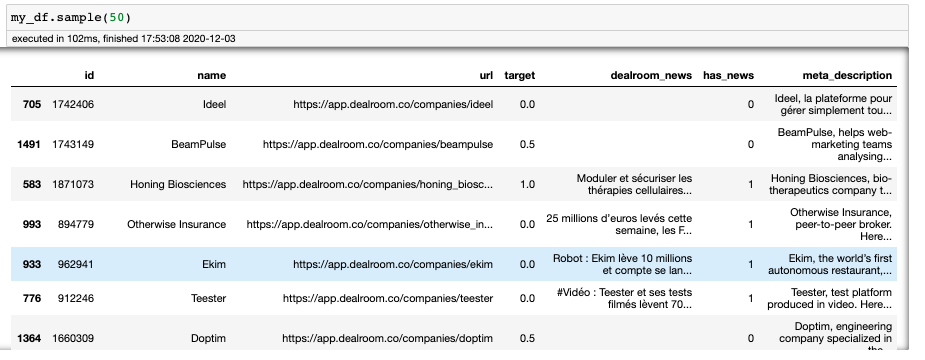

While all sites have meta descriptions, only 45% of companies have news in Dealroom

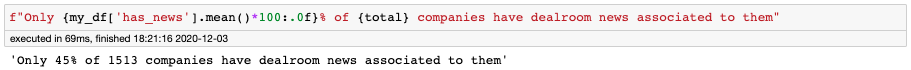

In both cases, descriptions are mostly in English, but encompass other languages:

+ French, German, Japanese for **Dealroom news**, with no language marker
+ Occasional French for **Meta description** (but there will be more language when we go out of the train environment)

`=> TODO: seek a language marker in Meta tags, or use a Google detect and translate API (free until 500k characters)`

Then preprocessing the text into lists of cleaned, lemmatized tokens

`=> TODO: if using a word2vec transfer learning corpus, maybe not use lemmatization?`

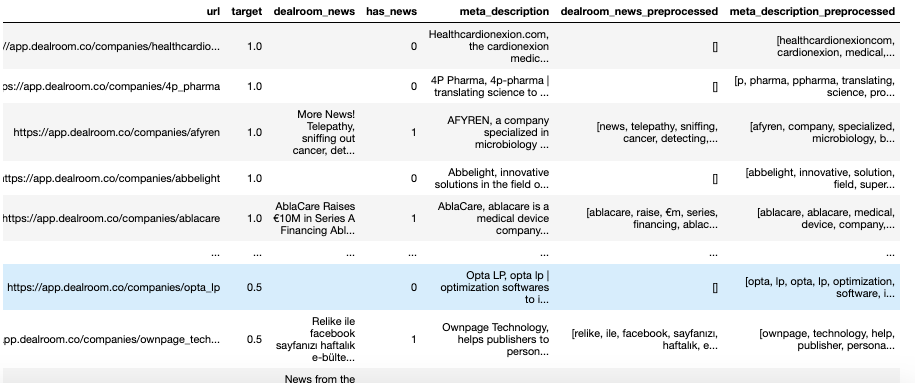

Fitting a Word2Vec embedding on meta_description_processed, then using it to vectorize the list of words as an array of vectors.
Flattening the arrays in lists and cropping at the shortest list (≈200 coordinates).
Using Embedding Projector to reduce dimensionnality in a meaningful way:

+ **Without supervision, no clusters** emerge
+ But **with supervision on target, clear clusters emerge** (but not fully separate)


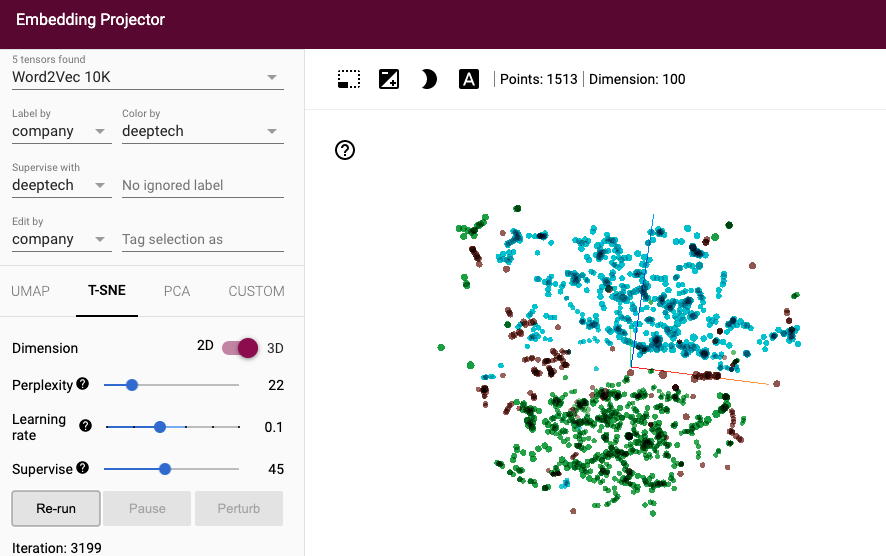

---
# Day 5

*The truth about day 5 is that I started by addin the industries, that weren't there yesterday, in order to better understand the clusters*

*BUT in the process I overwrote the dealroom news and metatags columns 😱*

*So the morning of day 5 I import the meta descriptions again, but not the dealroom news that were partial anyway*

`🤭 next time I won't forget pandas.DataFrame.to_csv…`

I realize that I had scraped the dealroom pages ('url' field) instead of the company websites ('website_url"), so I change my function, but 652 companies out of the 1513 throw an exception. In that case, I replace the meta description by the dealroom one.

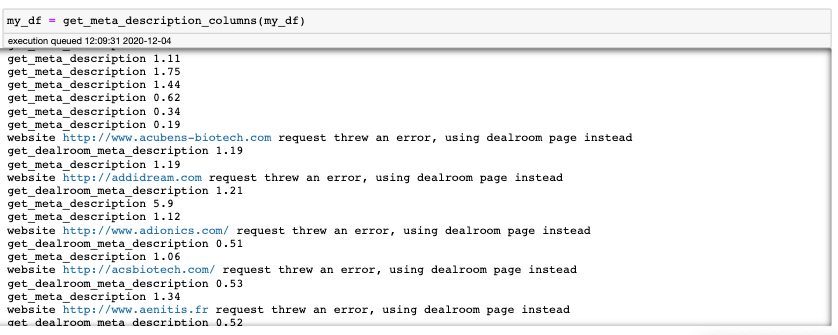

They throw an error because:
    
+ the company does not have a meta-description tag, ex.: https://www.addidream.com/en/home/
+ the website url is incorrect (error 404), ex.: http://www.acubens-biotech.com/
+ the website url is nan